**Reg2 - Modelo 2**

*Generales*

In [1]:
import sys
import os

sys.path.append(os.path.abspath('../package'))
%load_ext autoreload
%autoreload 2

from functions.data_loader import load_excel_data
file = "../../data/BASE DE DATOS PCC_cleaned.xlsx"
df_char = load_excel_data(file)

Archivo cargado correctamente desde ../../data/BASE DE DATOS PCC_cleaned.xlsx


*Preparación de los datos* - Modelo 2

In [2]:

from functions.data_preparation import prepare_regression_data

features = {
    'maquina': 'categorical',
    'seccion': 'categorical',
    'proceso': 'categorical',
    'usuario': 'categorical',
    'fabricadas': 'numeric',
    'hora_inicio': 'numeric',
    'dia_semana_inicio': 'categorical',
    'turno': 'categorical'
}

X_train, X_test, y_train, y_test, encoder, scaler = prepare_regression_data(df_char,features,"duracion_min")

Data prepared: 14608 training samples, 3653 test samples.
Categorical features encoded: ['maquina', 'seccion', 'proceso', 'usuario', 'dia_semana_inicio', 'turno']


In [3]:
from functions.data_preparation import select_features_lasso
features_lasso = select_features_lasso(X_train, y_train,  X_test=X_test, y_test=y_test)

Lasso coefficients:
maquina              -4.256991
seccion               9.084290
proceso               1.171373
usuario              -0.155240
fabricadas           25.725629
hora_inicio          -0.641885
dia_semana_inicio    -0.157784
turno                -3.015153
dtype: float64

Selected features by Lasso:
['maquina', 'seccion', 'proceso', 'usuario', 'fabricadas', 'hora_inicio', 'dia_semana_inicio', 'turno']

R² on test set: 0.2620


In [4]:
from functions.data_preparation import select_features_ols
features_ols,_ = select_features_ols(X_train, y_train, p_threshold=0.05)

P-values:
maquina              1.549844e-192
seccion               1.240006e-52
proceso               2.493724e-23
usuario               2.259700e-04
fabricadas            0.000000e+00
hora_inicio           1.381369e-01
dia_semana_inicio     3.431552e-01
turno                 5.295993e-09
dtype: float64

Significant features (p <= 0.05):
['maquina', 'seccion', 'proceso', 'usuario', 'fabricadas', 'turno']


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import Lasso, LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
models = {
    'LinearRegression': {
        'model': LinearRegression(),
        'params': {}
    },
    'Lasso': {
        'model': Lasso(),
        'params': {
            'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]
        }
    },
    'Ridge': {
        'model': Ridge(),
        'params': {
            'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]
        }
    },
    'RandomForest': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'n_estimators': [50, 100],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5]
        }
    },
    'GradientBoosting': {
        'model': GradientBoostingRegressor(random_state=42),
        'params': {
            'n_estimators': [50, 100],
            'learning_rate': [0.05, 0.1],
            'max_depth': [3, 5]
        }
    },
    'KNN': {
        'model': KNeighborsRegressor(),
        'params': {
            'n_neighbors': [1,3, 5, 7, 9, 11,15,20,25,30,35,40],
            'weights': ['uniform', 'distance'],
            'p': [1, 2]  # 1 = Manhattan, 2 = Euclidean
        }
    }
}

In [6]:
from functions.model_evaluation import evaluate_regression_models
# Filter X_train and X_test to keep only features selected by OLS
X_train_selected = X_train[features_ols]
X_test_selected = X_test[features_ols]
tuned_results, summary_metrics, all_grid,best_models = evaluate_regression_models(
    models,
    X_train, y_train,
    X_test=X_test,
    y_test=y_test,
    scoring="neg_root_mean_squared_error",
    cv=5
)

Evaluating: LinearRegression
Best Params                 {}
RMSE CV              46.174184
MAE CV               33.373086
R2 CV                 0.260329
RMSE Test            47.056712
MAE Test             34.503612
R2 Test               0.261997
Training Time (s)     3.487015
dtype: object


Evaluating: Lasso
Best Params          {'alpha': 0.001}
RMSE CV                     46.174184
MAE CV                      33.373081
R2 CV                        0.260329
RMSE Test                   47.056729
MAE Test                    34.503595
R2 Test                      0.261996
Training Time (s)             2.49154
dtype: object


Evaluating: Ridge
Best Params          {'alpha': 10.0}
RMSE CV                    46.174161
MAE CV                     33.373709
R2 CV                        0.26033
RMSE Test                  47.056688
MAE Test                   34.503755
R2 Test                     0.261997
Training Time (s)           0.197862
dtype: object


Evaluating: RandomForest
Best Params   

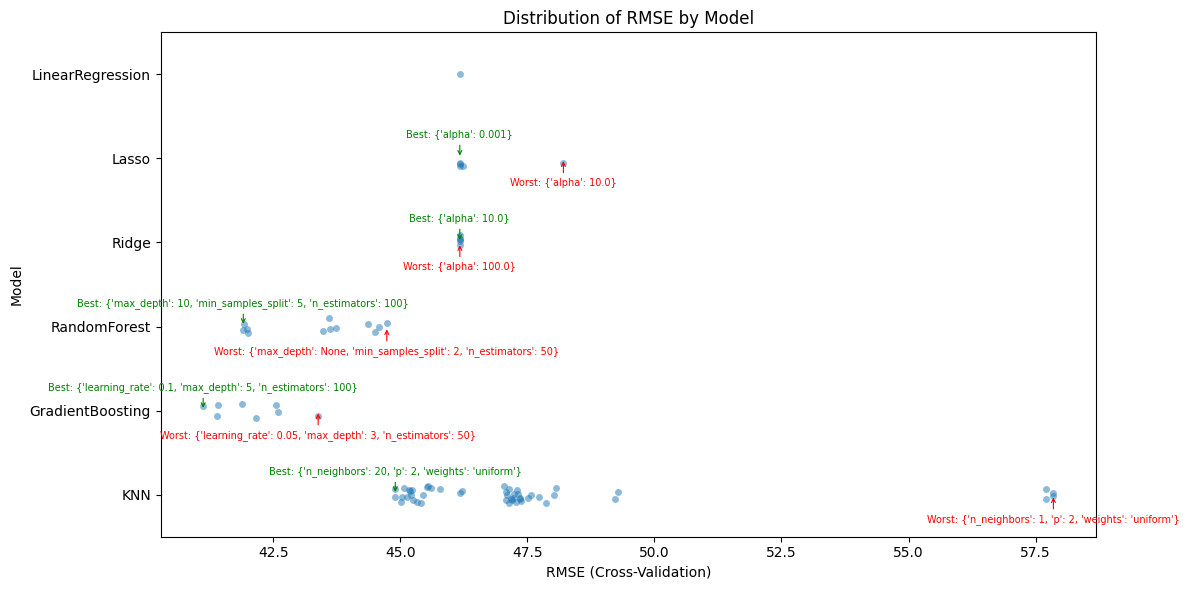

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,...,Model,param_alpha,param_max_depth,param_min_samples_split,param_n_estimators,param_learning_rate,param_n_neighbors,param_p,param_weights,rmse
0,0.008008,0.001032,0.002114,0.000736,{},-46.190890,-46.004186,-47.117166,-45.558314,-45.985655,...,LinearRegression,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.171242
1,0.011051,0.000681,0.004037,0.000635,{'alpha': 0.001},-46.190810,-46.004222,-47.117159,-45.558296,-45.985724,...,Lasso,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.171242
2,0.010294,0.000993,0.003436,0.000218,{'alpha': 0.01},-46.190095,-46.004553,-47.117100,-45.558136,-45.986349,...,Lasso,0.010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.171247
3,0.010716,0.000589,0.003438,0.000386,{'alpha': 0.1},-46.183496,-46.008405,-47.117022,-45.557083,-45.993097,...,Lasso,0.100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.171821
4,0.010715,0.001075,0.003839,0.000596,{'alpha': 1.0},-46.173434,-46.095244,-47.166588,-45.600150,-46.110934,...,Lasso,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.229270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,0.031570,0.005653,0.163412,0.016028,"{'n_neighbors': 35, 'p': 2, 'weights': 'distan...",-46.436106,-47.644603,-48.360246,-46.610190,-47.166231,...,KNN,NaN,NaN,NaN,NaN,NaN,35.0,2.0,distance,47.243475
75,0.037284,0.006497,0.270571,0.085690,"{'n_neighbors': 40, 'p': 1, 'weights': 'uniform'}",-45.404408,-46.407145,-46.509769,-45.186336,-45.427995,...,KNN,NaN,NaN,NaN,NaN,NaN,40.0,1.0,uniform,45.787131
76,0.038336,0.004923,0.225946,0.031340,"{'n_neighbors': 40, 'p': 1, 'weights': 'distan...",-46.535073,-47.926238,-48.419878,-46.656260,-47.316276,...,KNN,NaN,NaN,NaN,NaN,NaN,40.0,1.0,distance,47.370745
77,0.035321,0.008715,0.161747,0.031940,"{'n_neighbors': 40, 'p': 2, 'weights': 'uniform'}",-45.301406,-45.995598,-46.352166,-45.025497,-45.073541,...,KNN,NaN,NaN,NaN,NaN,NaN,40.0,2.0,uniform,45.549642


In [7]:
from functions.plotter import plot_cv_metric_distribution
plot_cv_metric_distribution([all_grid], metric_name="rmse", maximize=False)

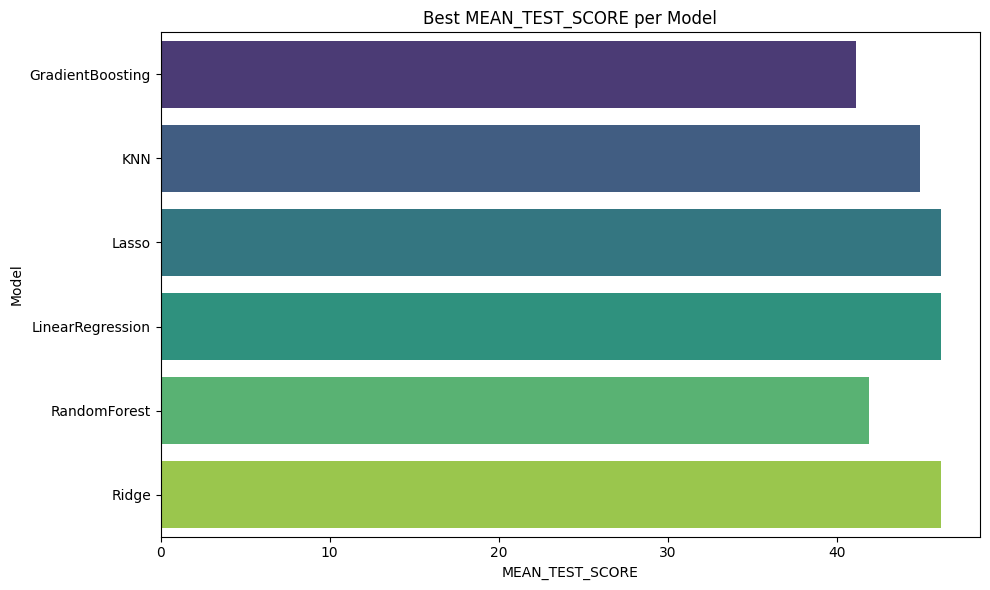

In [8]:
from functions.plotter import plot_best_metric_per_model
best_rmse_df = plot_best_metric_per_model([all_grid], metric='mean_test_score', maximize=False)

In [9]:
from functions.save_models import save_pipeline_models
save_path = "./results/reg2"
save_pipeline_models(encoder, scaler, best_models, save_path)

Guardado: ./results/reg2\LinearRegression_pipeline.joblib
Guardado: ./results/reg2\Lasso_pipeline.joblib
Guardado: ./results/reg2\Ridge_pipeline.joblib
Guardado: ./results/reg2\RandomForest_pipeline.joblib
Guardado: ./results/reg2\GradientBoosting_pipeline.joblib
Guardado: ./results/reg2\KNN_pipeline.joblib
